# Projekt "Poeta A.I."
#### by [Krystian Kubala](https://www.linkedin.com/in/krystian-kubala-96b9b3160/) & [Miroslaw Mamczur](https://www.linkedin.com/in/miroslawmamczur/) [[blog Mirka](https://miroslawmamczur.pl/)]
 
"*Naszym marzeniem jest, by każdy z nas mógł zostać poetą*" - to hasło przyświecało nam od początku.
Z tą myślą przygotowaliśmy kod, który każdego z nas może zamienić w poetę.
 
Jak? Wystarczy powiedzieć jedno zdanie do mikrofonu komputera. On zarejestruje słowa, które następnie potraktujemy jako pierwszy wers nowego dzieła lirycznego.
Nie trzeba się martwić wierszem - o to zadba wytrenowany model, który dopisze resztę naszego unikalnego utworu.

Model został wytrenowany na dziełach najznakomitszych polskich poetów.
 
**Uwaga.** Chcesz to baw się do woli parametrami i dobierz je jak uważasz :)

Z całego serducha zapraszamy Was do stworzenia własnych dzieł.

**UWAGA:** Aby kod działał poprawnie musi być przeliczany na GPU! (Edytuj-> Ustawienia notatnika ->GPU)

In [ ]:
#pobranie do pamięci Colab wytrenowanych modeli i plików z naszego Google Drive na potrzeby projektu
!gdown --id "1ehYE-Qs45dhe615qGQt_CSWYkXWZmxlM"
!gdown --id "1JWbFpt_GqydW59iLjKUM6uJn7tBZPUY_"
!gdown --id "1xuLdA2jCXMYWGrjMhsASxs_wFDWWVUIZ"
!gdown --id "1qupWwgbueb-K3hzmuROvbXjA2LwMPYY7"
!gdown --id "1TZE4hx7pTI1db4iORpKZauG-CCxUrKVw"

Downloading...
From: https://drive.google.com/uc?id=1ehYE-Qs45dhe615qGQt_CSWYkXWZmxlM
To: /content/best_xgb.pickle
6.40MB [00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JWbFpt_GqydW59iLjKUM6uJn7tBZPUY_
To: /content/tgidf.pickle
100% 13.3k/13.3k [00:00<00:00, 12.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xuLdA2jCXMYWGrjMhsASxs_wFDWWVUIZ
To: /content/pl_spacy_model-0.1.0.tar.gz
170MB [00:03, 48.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qupWwgbueb-K3hzmuROvbXjA2LwMPYY7
To: /content/checkpoint_mm_model_355M_final.tar
1.44GB [00:07, 190MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TZE4hx7pTI1db4iORpKZauG-CCxUrKVw
To: /content/banksterzy.py
100% 11.3k/11.3k [00:00<00:00, 18.5MB/s]


In [ ]:
#instalacja dodatkowych bibliotek
!pip install ffmpeg-python
!pip install SpeechRecognition
!pip install python-Levenshtein
!pip install fuzzywuzzy
!pip install -q gpt-2-simple
!pip install stop-words
!pip install 'pl_spacy_model-0.1.0.tar.gz'
!pip install python-pptx
!pip install git+https://github.com/robintw/PandasToPowerpoint.git

     |████████████████████████████████| 32.8MB 101kB/s 
     |████████████████████████████████| 51kB 2.1MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144790 sha256=f12e17861aba9730f0b13eaf135de9176f58fafa0187092026d6f99e874b9c11
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32916 sha256=6358c4f9a61ed13758186387f5ef7a4666dc1af3239e6f471f6fcbfa9ab296d0
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
Processing ./pl_spacy_model-0.1.0.tar.gz
  Created wheel for pl-spacy-model: filename=pl_spacy_model-0.1.0-cp36-none-any.whl size=170055760 sha256=0a5f2af643889c1fb349ab64ecd9c000473ac44bb9281c15f8894b306615b500
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
%tensorflow_version 1.x
import pandas as pd
import gpt_2_simple as gpt2
import tensorflow as tf
import banksterzy as bank #biblioteka, którą pobraliśmy w pierwszym kroku jako jeden z plików

from datetime import datetime
from google.colab import files

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



**Nagraj słowa, od których ma się rozpoczynać Twój wiersz :)**

In [ ]:
words = bank.podyktuj_wers(5)
print('---------------------')
print(words)

Mów teraz


<IPython.core.display.Javascript object>

Nagrywanie zakończone, dziękuję!
---------------------
Poproszę o nowy wiersz


**Generowanie wiersza z modelu GPT-2**

In [ ]:
#wypakowanie i wczytanie wytrenowanych parametów dla modelu GPT-2
bank.unpack_checkpoints(run_name='mm_model_355M_final')

sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='mm_model_355M_final')

Loading checkpoint checkpoint/mm_model_355M_final/model-160000
INFO:tensorflow:Restoring parameters from checkpoint/mm_model_355M_final/model-160000


In [ ]:
# wytrenowanie nsamples wierszy
poems = gpt2.generate(sess,
                          run_name='mm_model_355M_final',
                          length=200,
                          temperature=0.7,
                          prefix = words,
                          nsamples=5,
                          batch_size=5,
                          return_as_list=True)

**Oto Twój wiersz:**

In [ ]:
# wybór 1 wiersza spełniającego wstępne warunki z listy poems
wygenerowany_wiersz = bank.final_poem(poems, words)
print(wygenerowany_wiersz)

Poproszę o nowy wiersz, któryś jest, jak byłeś.
Szedłem tu i na miasto, a było tam stare,
Tak głośno, że wzrok śmiały był ukryty szorstki.
Księża było wprost tam i mrok, a nocą było
Lepkiem, niźli ślepy zwierz. Wieczorem było,
A później noc mrozem, a później pół rosną,
Niż się przed ziemi zjawił lub w nocy milosną.


**A gdybyś chciał sprawdzić w jakim % Twój wiersz odpowiada której epoce literackiej, to możesz to sprawdzić tutaj:**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0


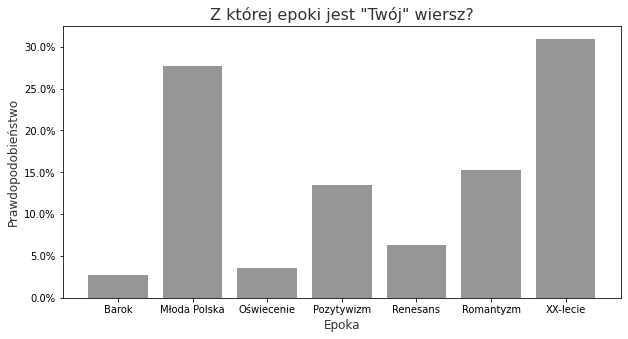

In [ ]:
ktora_epoka, df_wiersz = bank.ktora_epoka(wygenerowany_wiersz)

**A tutaj możesz zapisać wynik w formie slajdów :)**

In [ ]:
bank.pobierz_ppt(words, df_wiersz)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done
